# Cascading Food Risks

## Imports

In [1]:
import pandas as pd
from src import trade_graph

%matplotlib inline

# Generate / load input data

In [2]:
trade_data = pd.read_csv("https://raw.githubusercontent.com/zutn/Trade-Reduction/master/trade_by_country_2017.csv", sep=";")

In [3]:
print(len(trade_data))

36771


In [4]:
trade_data.sample(4)

Reporter Countries Partner Countries          Element  Y2017
11383                   Fiji  Unspecified Area  Import Quantity   10.0
28212  Sao Tome and Principe             Egypt  Import Quantity  245.0
36516                 Zambia           Denmark  Export Quantity  135.0
30169           South Africa           Armenia  Export Quantity   23.0

In [5]:
trade_data.columns = ['reporter', 'partner', 'element', 'value']
trade_data.sample(4)

reporter              partner          element    value
14923      India              Hungary  Export Quantity   4103.0
26258   Portugal               Gambia  Import Quantity      0.0
12270     Gambia          Netherlands  Import Quantity  41813.0
20872  Mauritius  Antigua and Barbuda  Import Quantity     69.0

In [6]:
poverty_data = pd.read_csv("../data/poverty_data.csv")
poverty_data.population_poverty = poverty_data.population_poverty.apply(lambda p: int(p.replace(',', '')))

In [7]:
poverty_data.sample(5)

country  percent_poverty  population  population_poverty
17         Chad             30.8    15477751             4767147
87  South Korea              0.2    51635256              103271
79       Poland              0.4    37978548              151914
62     Bulgaria              1.4     7024216               98339
38        Ghana             11.8    29767108             3512519

In [8]:
locust_data = pd.read_csv("../data/locust_data.csv")

In [9]:
locust_data.sample(5)

country locust_risk covid_locust_risk
9   Djibouti         Low               NaN
15     Egypt      Medium               NaN
7    Eritrea        High              High
17     Yemen        High               NaN
26     India      Medium              High

# Create scenario plots

Now we'll generate trade graphs for different lists of countries who cut off exports, highlighting resulting deficits using a chloropleth map

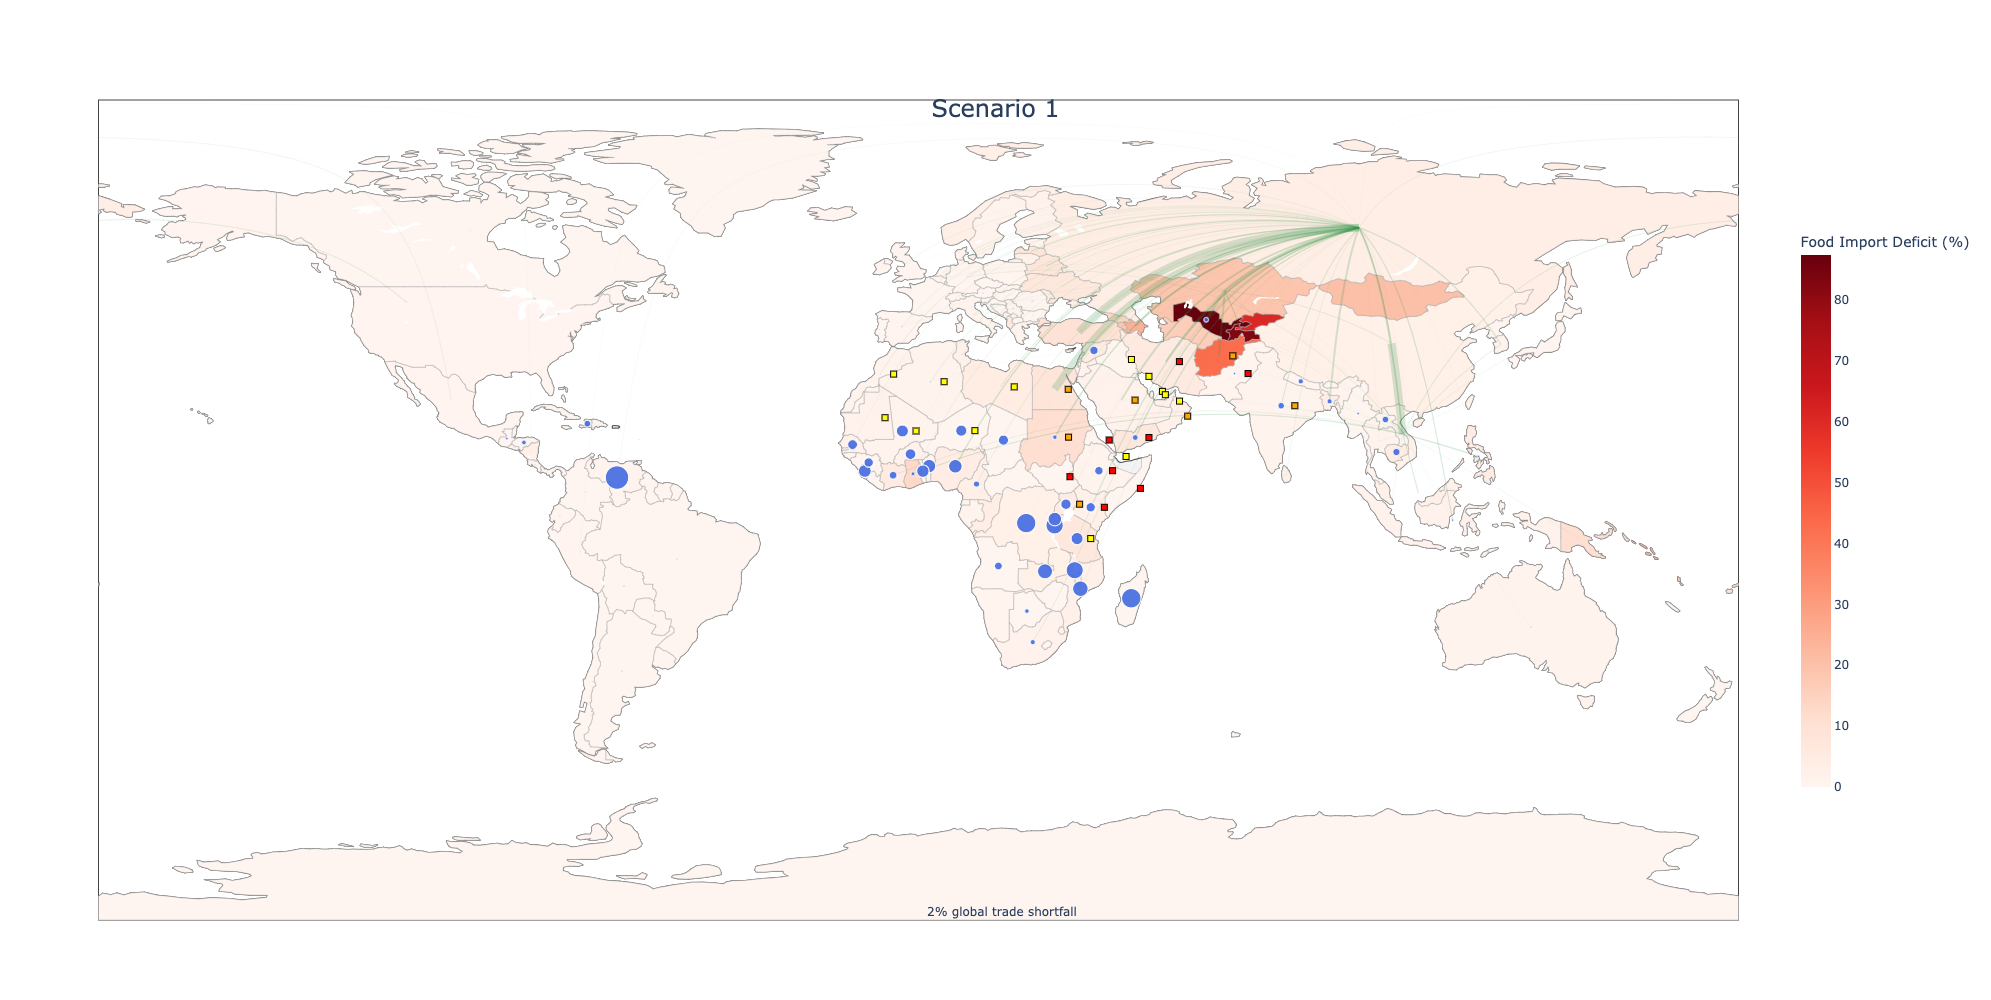

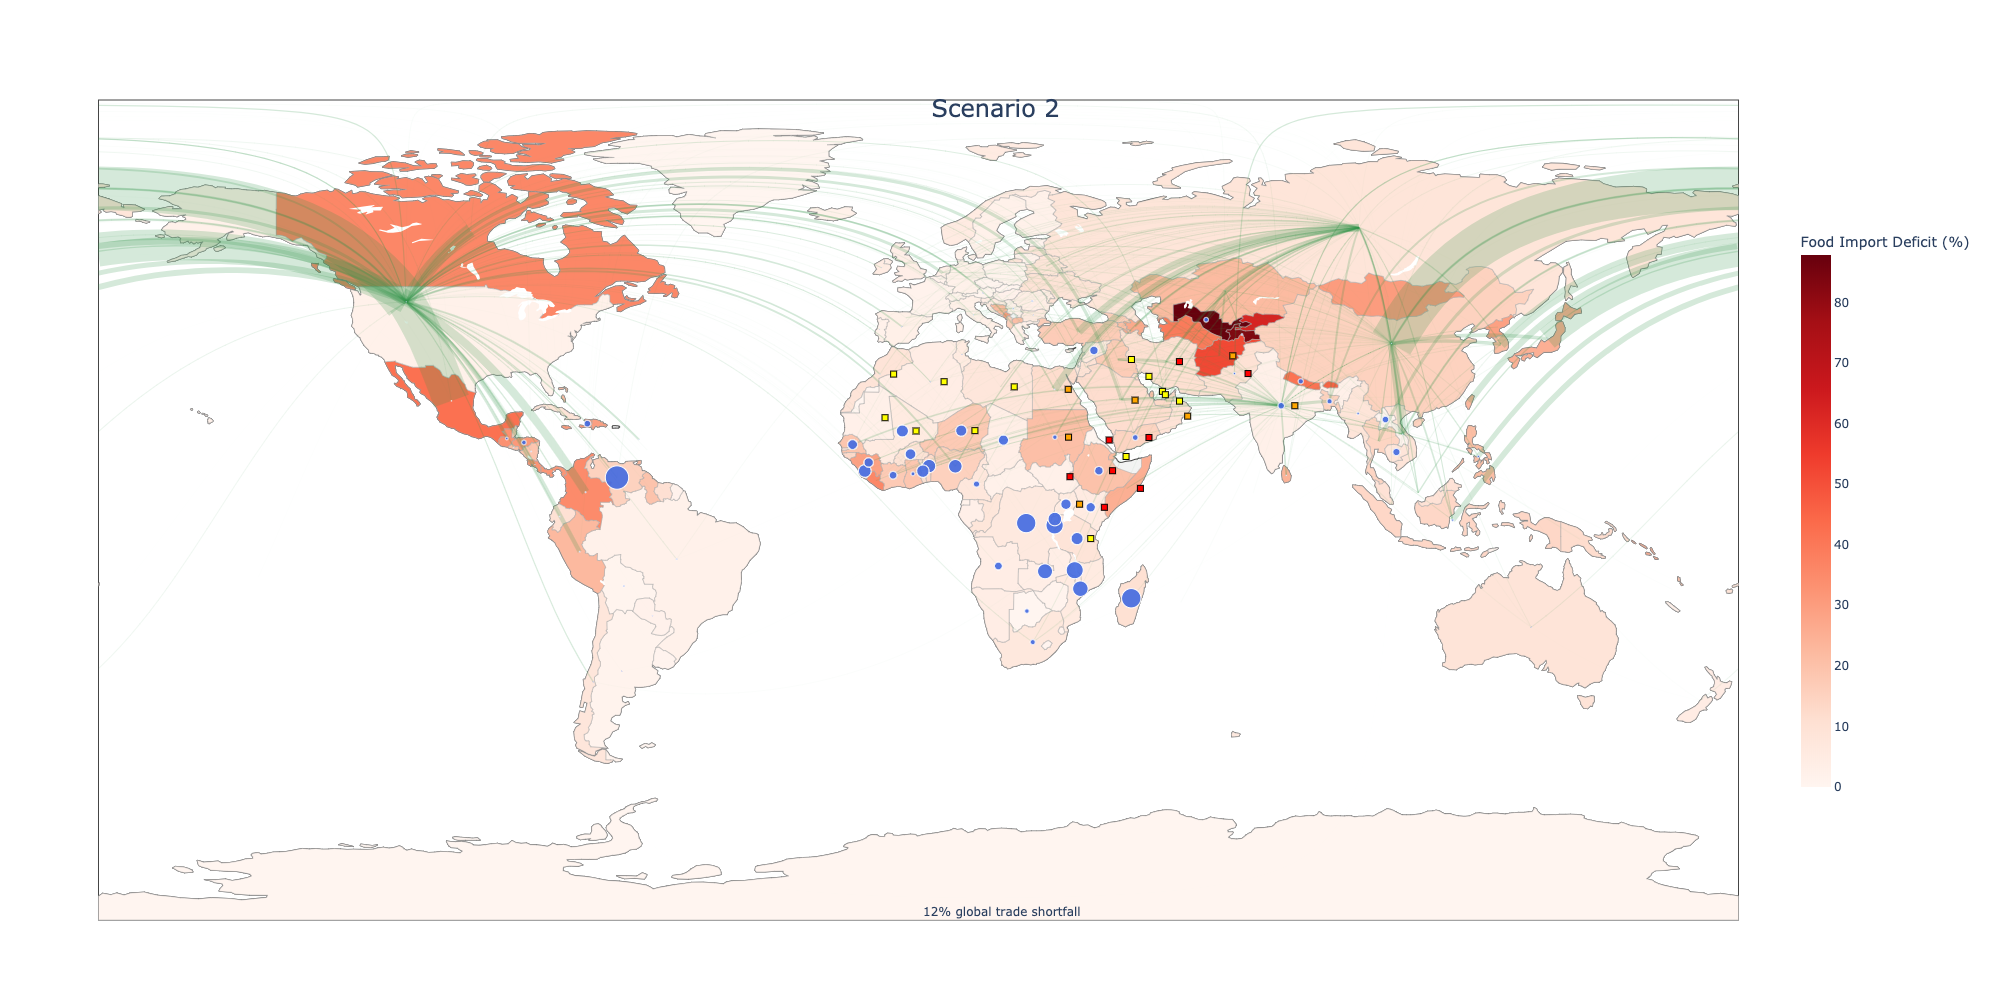

In [12]:
tg = trade_graph.TradeGraph(trade_data, locust_data, poverty_data) 
tg.plot_export_restriction_scenario({"Russian Federation": 0.7, "Kazakhstan":0, "Viet Nam":0.5}, title='Scenario 1', show_poverty=True, show_locusts=True)
tg.plot_export_restriction_scenario({"Russian Federation": 0.7, "Kazakhstan":0, "China, mainland":0.7, "United States of America": 0.5, "Iran (Islamic Republic of)": 0.5, "Serbia":0.5, "Viet Nam":0.5, "India":0.5}, title='Scenario 2', show_poverty=True, show_locusts=True)